In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
sns.set(style="whitegrid")
pd.set_option('display.max_columns', 35)
pd.set_option('display.max_rows', 100)

### Loading the Dataset

In [3]:
df = pd.read_csv('Bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


### EDA and Data Cleaning

In [4]:
df.shape

(119390, 32)

In [5]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Changing 'reservation_status_date' dtype from object to datetime

In [7]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], format='%d/%m/%Y')

Filling 4 missing values in 'children' column with Mode of Column and changing dtype to 'int'

In [8]:
df['children'].fillna(df['children'].mode()[0], inplace=True)

In [9]:
df['children'] = df['children'].astype('int')

In [10]:
df.describe(include='object').T

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,August,13877
meal,119390,5,BB,92310
country,118902,177,PRT,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
reserved_room_type,119390,10,A,85994
assigned_room_type,119390,12,A,74053
deposit_type,119390,3,No Deposit,104641
customer_type,119390,4,Transient,89613


In [11]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(col)
        print(df[col].unique())
        print('-'*50)

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'J

Checking Missing Values

In [12]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               0
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Dropping 'agent', 'company' columns

In [13]:
df.drop(columns=['agent','company'], axis=1, inplace=True)

Dropping records from Dataframe where 'country' is missing

In [14]:
df.dropna(subset=['country'], inplace=True)

In [15]:
df.reset_index(drop=True, inplace=True)

Successfully handled Nulls

In [16]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902.000000,118902
mean,0.371373,104.308027,2016.157617,27.166726,15.800567,0.928891,2.502136,1.858404,0.104203,0.007948,0.032010,0.087139,0.131629,0.221174,2.330676,102.000808,0.061883,0.571706,2016-07-30 07:20:24.584952064
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483174,106.903127,0.707479,13.589774,8.780371,0.996211,1.900165,0.578576,0.399166,0.097379,0.176026,0.845855,1.484647,0.652775,17.630161,50.487004,0.244168,0.792678,NaN


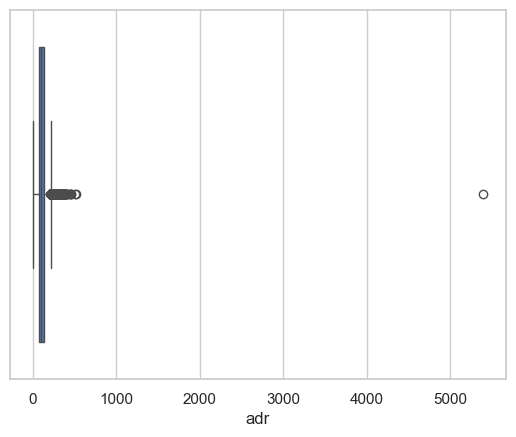

In [17]:
sns.boxplot(df['adr'], orient='h')
plt.show()

Let's remove that outlier

In [18]:
df = df[df['adr'] < 5000]

In [19]:
df.reset_index(drop=True, inplace=True)

### Data Analysis and Visualizations

In [20]:
cancelled_perc = df['is_canceled'].value_counts(normalize=True)
cancelled_perc*100

is_canceled
0    62.863222
1    37.136778
Name: proportion, dtype: float64

There are a significant number of reservations that have not been cancelled. Still 37% of clients have cancelled their reservations, which would have a significant impact on the hotel's earnings.

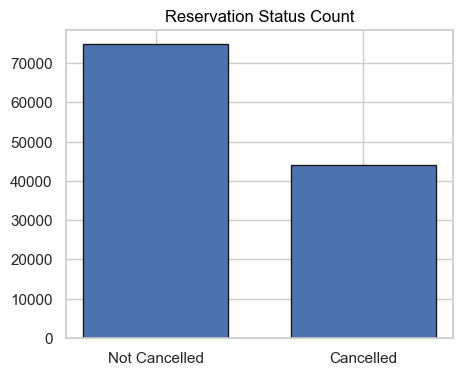

In [21]:
plt.figure(figsize=(5,4))

plt.bar(x=['Not Cancelled','Cancelled'], height=df['is_canceled'].value_counts(), edgecolor='k', width=0.7)
plt.title('Reservation Status Count', color='black')
plt.show()

In [22]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

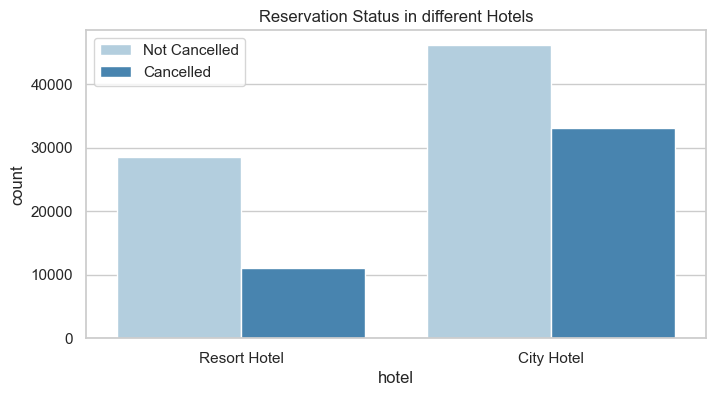

In [23]:
plt.figure(figsize=(8,4))
sns.countplot(df, x='hotel', hue='is_canceled', palette='Blues')

plt.legend(['Not Cancelled','Cancelled'])
plt.title('Reservation Status in different Hotels')
plt.show()

2 things to observe from above Count Plot. First is that City hotels have more bookings compared to Resort hotels, implying that city hotels on average are cheaper/easily accessible than Resorts. Second point to note is the difference in non-cancelled booking and cancelled bookings is more in Resorts, cancelled being less. In case of City Hotels, difference is less and cancelled bookings are very significant. The business should focus on this aspect more.

In [24]:
resort_hotel = df[df['hotel'] == 'Resort Hotel']

In [25]:
resort_hotel['is_canceled'].value_counts(normalize=True)*100

is_canceled
0    72.024952
1    27.975048
Name: proportion, dtype: float64

In [26]:
city_hotel = df[df['hotel'] == 'City Hotel']

In [27]:
city_hotel['is_canceled'].value_counts(normalize=True)*100

is_canceled
0    58.288885
1    41.711115
Name: proportion, dtype: float64

In [28]:
a = resort_hotel.groupby('reservation_status_date')['adr'].mean()
b = city_hotel.groupby('reservation_status_date')['adr'].mean()

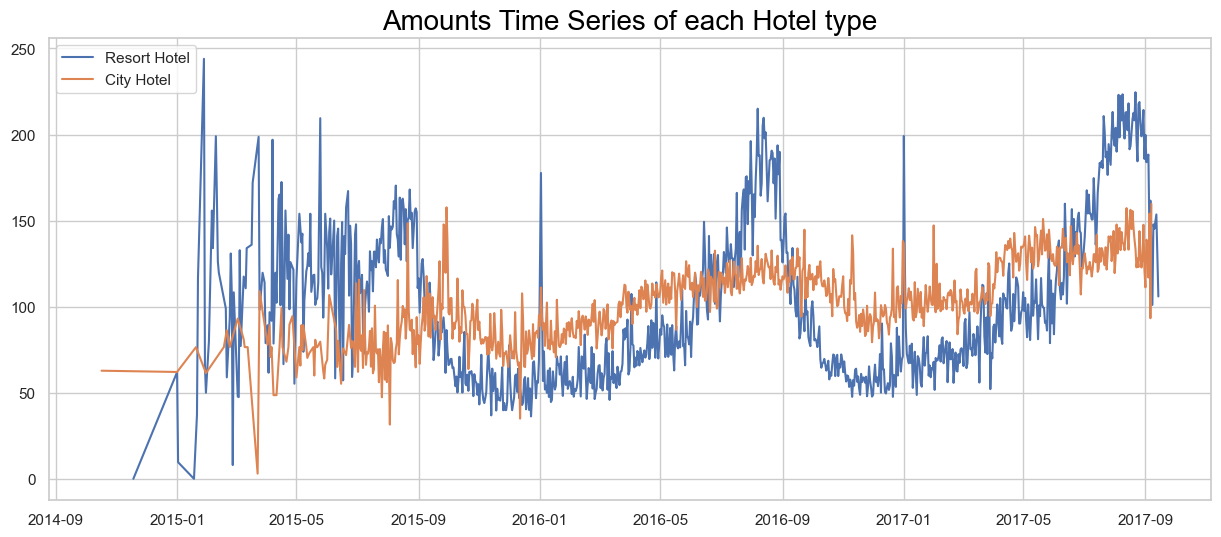

In [29]:
plt.figure(figsize=(15,6))

plt.plot(a.index, a.values, label='Resort Hotel')
plt.plot(b.index, b.values, label='City Hotel')
plt.title('Amounts Time Series of each Hotel type', color='black', fontsize=20)

plt.legend(loc='best')
plt.show()

The Time Series above shows that, on certain days, the average daily rate for a city hotel is less than that of a resort hotel, and on other dyas, it is even less. It goes without saying that weekends and holidays may see a rise in resort hotel rates.

In [40]:
df['Month'] = df['reservation_status_date'].dt.month_name()

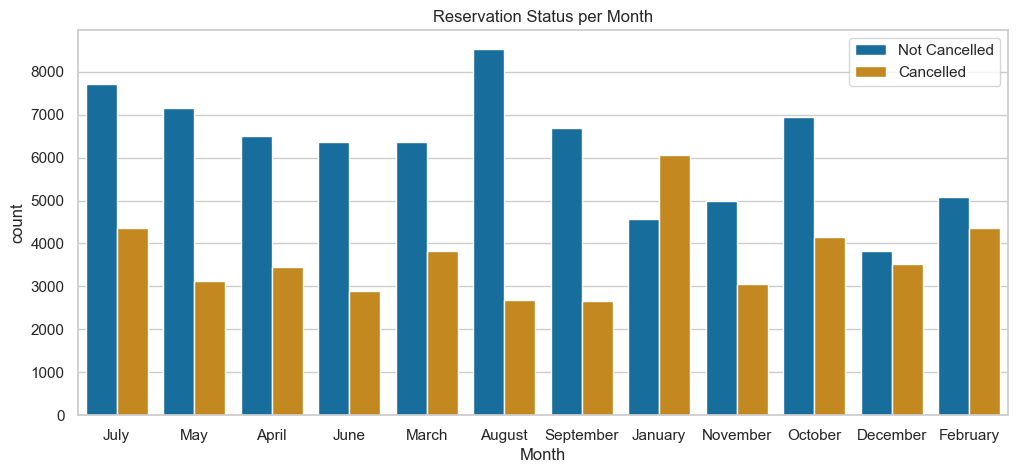

In [41]:
plt.figure(figsize=(12,5))
sns.countplot(df, x='Month', hue='is_canceled', palette='colorblind')

plt.legend(['Not Cancelled','Cancelled'])
plt.title('Reservation Status per Month')
plt.show()

This grouped bar graph is plotted to analyze the months with the highest and lowest reservations per each reservation status. As seen, August has highest number of confirmed reservations and lowest number of cancelled reservations. January has highest number of cancelled reservations. 

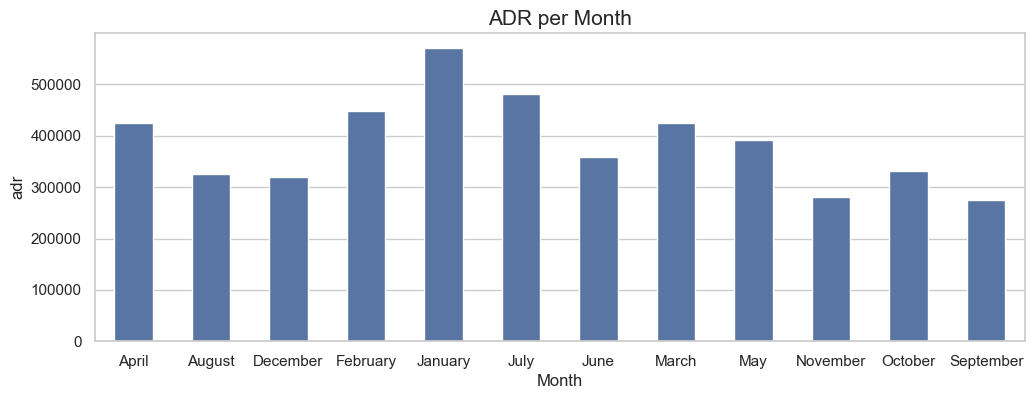

In [43]:
plt.figure(figsize=(12,4))
sns.barplot(x='Month', y='adr', data=df[df['is_canceled'] == 1].groupby('Month')['adr'].sum().reset_index(), width=0.5)

plt.title('ADR per Month', fontsize=15)
plt.show()

Since January has highest accommodation price of all (ADR stands for Average Daily Rate), the cancellation were also higher. This tells us that accommodation prices are responsible for number of cancellations.

Below Horizontal Bar Graph shows the top 10 countries with highest number of cancellations. Top country with significant margin is Portugal.

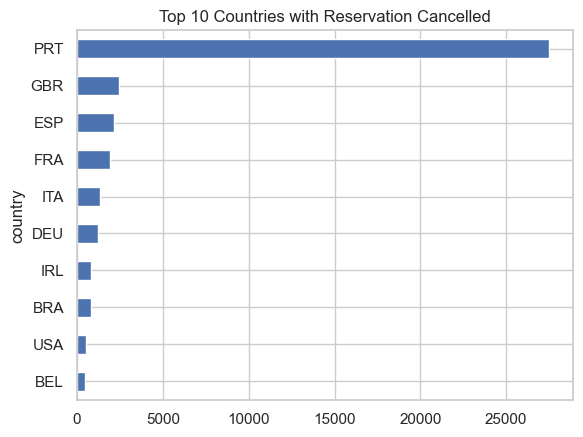

In [33]:
df[df['is_canceled'] == 1]['country'].value_counts().head(10).sort_values().plot(kind='barh', title='Top 10 Countries with Reservation Cancelled')
plt.show()

Checking Market Segements - Mediums through which customers are getting to know about the Hotels.

In [34]:
df['market_segment'].value_counts(normalize=True)*100

market_segment
Online TA        47.436943
Offline TA/TO    20.318584
Groups           16.657555
Direct           10.470055
Corporate         4.298534
Complementary     0.617320
Aviation          0.199325
Undefined         0.001682
Name: proportion, dtype: float64

Nearly half of the customers contact Online Travel Agencies to book accomoodations. Only 10% of bookings are made directly, indicating the tech-savviness of the modern generation.

In [35]:
df[df['is_canceled'] == 1]['market_segment'].value_counts(normalize=True)*100

market_segment
Online TA        46.967570
Groups           27.396050
Offline TA/TO    18.744904
Direct            4.350485
Corporate         2.214875
Complementary     0.203823
Aviation          0.117764
Undefined         0.004529
Name: proportion, dtype: float64

In [36]:
cancelled_df_adr = df[df['is_canceled'] == 1].groupby('reservation_status_date')[['adr']].mean()
cancelled_df_adr.reset_index(inplace=True)
cancelled_df_adr.sort_values('reservation_status_date', inplace=True)
cancelled_df_adr['Status'] = 'Cancelled'
print(cancelled_df_adr)

    reservation_status_date         adr     Status
0                2014-10-17   62.800000  Cancelled
1                2014-11-18    0.000000  Cancelled
2                2015-01-01   62.062779  Cancelled
3                2015-01-02    9.633750  Cancelled
4                2015-01-18    0.000000  Cancelled
..                      ...         ...        ...
897              2017-08-26  178.200000  Cancelled
898              2017-08-27  167.300000  Cancelled
899              2017-08-28   81.416667  Cancelled
900              2017-08-29  144.253333  Cancelled
901              2017-08-31  189.750000  Cancelled

[902 rows x 3 columns]


In [37]:
not_cancelled_df_adr = df[df['is_canceled'] == 0].groupby('reservation_status_date')[['adr']].mean()
not_cancelled_df_adr.reset_index(inplace=True)
not_cancelled_df_adr.sort_values('reservation_status_date', inplace=True)
not_cancelled_df_adr['Status'] = 'Not Cancelled'
print(not_cancelled_df_adr)

    reservation_status_date         adr         Status
0                2015-07-01   31.650000  Not Cancelled
1                2015-07-02   95.924000  Not Cancelled
2                2015-07-03   97.645205  Not Cancelled
3                2015-07-04  110.480000  Not Cancelled
4                2015-07-05  100.308485  Not Cancelled
..                      ...         ...            ...
800              2017-09-08  101.012500  Not Cancelled
801              2017-09-09  147.778333  Not Cancelled
802              2017-09-10  145.272500  Not Cancelled
803              2017-09-12  153.570000  Not Cancelled
804              2017-09-14  105.930000  Not Cancelled

[805 rows x 3 columns]


In [38]:
combined_df = pd.concat([cancelled_df_adr,not_cancelled_df_adr])

In [39]:
px.line(combined_df.set_index('reservation_status_date'), color='Status', title='Average Daily Rate by Status')

As observed from the grpah above, reservations are cancelled when average daily rate is higher than when it is not cancelled. It clearly proves the above analysis. that the higher price leads to higher cancellations.

## Suggestions

1. Cancellation rates rise as the price does. Hotels could work on their pricing strategies and try to lower the rates for specific hotels based on their location. Some incentives such as discounts is also helpful.

2. There is a difference in ratio between cancelled and non-cancelled bookings in Resorts and City hotels. City hotels should work on their pricing strategies, such as providing discounts on accommodations during weekends and festive seasons.

3. As the cancellations are higher in January, hotels should induce their marketing and campaigning during the period.

4. Business should take a look at their strategies and hotel services in Portugal to reduce cancellations in the country. There maybe some country-specific reasons to look into.